In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix
from sklearn.utils import resample

In [4]:
df = pickle.load(open('../Data/df_pre_model', 'rb'))
df.head()

,airline,retweet_count,text,tweet_created,word_count,airline_sentiment,air_target
0,Virgin America,0,virginamerica dhepburn said,2015-02-24 11:35:52 -0800,3,neutral,0
1,Virgin America,0,virginamerica plus added commercials experienc...,2015-02-24 11:15:59 -0800,6,positive,1
2,Virgin America,0,virginamerica today must mean need take anothe...,2015-02-24 11:15:48 -0800,8,neutral,0
3,Virgin America,0,virginamerica really aggressive blast obnoxiou...,2015-02-24 11:15:36 -0800,11,negative,-1
4,Virgin America,0,virginamerica really big bad thing,2015-02-24 11:14:45 -0800,5,negative,-1


In [42]:
df['airline_sentiment'].value_counts()
# The dataset is not balance

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [44]:
# Import resample libary to generate resample data


In [45]:
df_neg = df[df['airline_sentiment']=='negative']
df_pos = df[df['airline_sentiment']=='positive']
df_neu = df[df['airline_sentiment']=='neutral']

In [53]:
# Generate data set for positive and nuetral data set
df_pos_resm = resample(df_pos,n_samples=9178,replace=True,random_state=101)
df_neu_resm = resample(df_neu,n_samples=9178,replace=True,random_state=101)

In [51]:
df_resample = pd.concat([df_pos_resm,df_neu_resm,df_neg])

In [52]:
df_resample['airline_sentiment'].value_counts()
# As it seen the data set is balance now

positive    9178
neutral     9178
negative    9178
Name: airline_sentiment, dtype: int64

In [54]:
# Define X and y data
X = df_resample['text']
y = df_resample['airline_sentiment']

In [55]:
# Split data set to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Deploying the models

# Log model using countvectorizer

In [57]:
pipe = Pipeline([('cv',CountVectorizer()),('logmodel',LogisticRegression(max_iter=1000))])

In [58]:
param_grid = {'cv__stop_words':['english'],'cv__max_df':[0.5,.75,1.0],'cv__min_df':[1,2],
              'cv__max_features':[2000,3000]
              ,'logmodel__solver' : ['newton-cg', 'lbfgs', 'saga']}

In [59]:
grd_log = GridSearchCV(pipe,param_grid=param_grid,cv=3)

In [60]:
grd_log.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('logmodel',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'cv__max_df': [0.5, 0.75, 1.0],
                         'cv__max_features': [2000, 3000], 'cv__min_df': [1, 2],
                         'cv__stop_words': ['english'],
                         'logmodel__solver': ['newton-cg', 'lbfgs', 'saga']})

In [61]:
grd_log.best_params_

{'cv__max_df': 0.5,
 'cv__max_features': 3000,
 'cv__min_df': 2,
 'cv__stop_words': 'english',
 'logmodel__solver': 'saga'}

In [62]:
prd_log = grd_log.predict(X_test)

In [64]:
print('Classificaion Report    \n',classification_report(y_test,prd_log))

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.85      0.77      0.81      2253
     neutral       0.78      0.84      0.81      2325
    positive       0.89      0.91      0.90      2306

    accuracy                           0.84      6884
   macro avg       0.84      0.84      0.84      6884
weighted avg       0.84      0.84      0.84      6884



# SVC Model

In [65]:
cv = CountVectorizer(max_features=3000,max_df=.5,min_df=2,stop_words='english')
X_feat_train = cv.fit_transform(X_train)
X_feat_test = cv.transform(X_test)

In [66]:
svc = SVC()

In [67]:
svc.fit(X_feat_train,y_train)

SVC()

In [68]:
prd_svc = svc.predict(X_feat_test)

In [69]:
print('Classificaion Report    \n',classification_report(y_test,prd_svc))

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.91      0.83      0.87      2253
     neutral       0.84      0.91      0.87      2325
    positive       0.93      0.93      0.93      2306

    accuracy                           0.89      6884
   macro avg       0.89      0.89      0.89      6884
weighted avg       0.89      0.89      0.89      6884



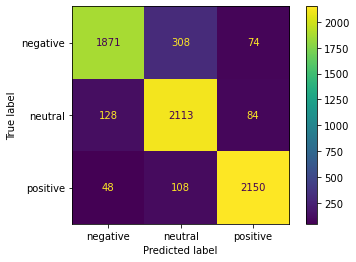

In [70]:
plot_confusion_matrix(svc,X_feat_test,y_test)

# Linear SVC using Countvectorizer 

In [71]:
lr_svc = LinearSVC()

In [72]:
lr_svc.fit(X_feat_train,y_train)

LinearSVC()

In [75]:
prd_lr_svc = lr_svc.predict(X_feat_test)

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.86      0.77      0.81      2253
     neutral       0.79      0.85      0.82      2325
    positive       0.90      0.92      0.91      2306

    accuracy                           0.85      6884
   macro avg       0.85      0.85      0.85      6884
weighted avg       0.85      0.85      0.85      6884



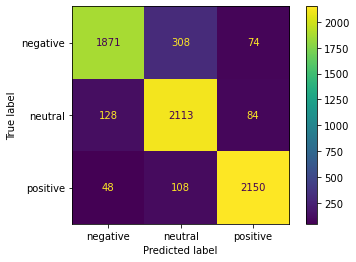

In [76]:
print('Classificaion Report    \n',classification_report(y_test,prd_lr_svc))
plot_confusion_matrix(svc,X_feat_test,y_test)

# Naive Base, Coutvectorizer

In [77]:
pipe = Pipeline([('cv',CountVectorizer()),('nb',MultinomialNB())])

In [78]:
param_grid = {'cv__stop_words':['english'],'cv__max_df':[0.5,0.75,1.0],'cv__min_df':[1,2],
              'cv__max_features':[2000,3000]}

In [79]:
grd_nb = GridSearchCV(pipe,param_grid=param_grid,cv=3)

In [80]:
grd_nb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cv__max_df': [0.5, 0.75, 1.0],
                         'cv__max_features': [2000, 3000], 'cv__min_df': [1, 2],
                         'cv__stop_words': ['english']})

In [81]:
grd_nb.best_params_

{'cv__max_df': 0.5,
 'cv__max_features': 3000,
 'cv__min_df': 1,
 'cv__stop_words': 'english'}

In [82]:
prd_grd_nb = grd_nb.predict(X_test)

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.75      0.81      0.78      2253
     neutral       0.79      0.67      0.72      2325
    positive       0.82      0.88      0.85      2306

    accuracy                           0.79      6884
   macro avg       0.79      0.79      0.78      6884
weighted avg       0.79      0.79      0.78      6884



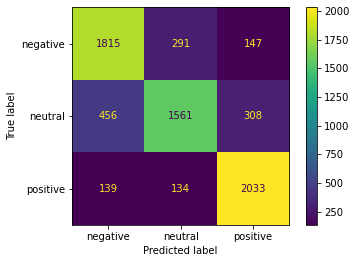

In [83]:
print('Classificaion Report    \n',classification_report(y_test,prd_grd_nb))
plot_confusion_matrix(grd_nb,X_test,y_test)

In [84]:
accuracy_score(y_test,prd_grd_nb)

0.7857350377687391

# Naive Base, TFIDF vectorizer

In [85]:
pipe_tfidf  = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])

In [87]:
pipe_tfidf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [88]:
prd_NB_tfidf = pipe_tfidf.predict(X_test)

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.79      0.85      0.82      2253
     neutral       0.83      0.74      0.78      2325
    positive       0.86      0.89      0.87      2306

    accuracy                           0.83      6884
   macro avg       0.83      0.83      0.83      6884
weighted avg       0.83      0.83      0.83      6884



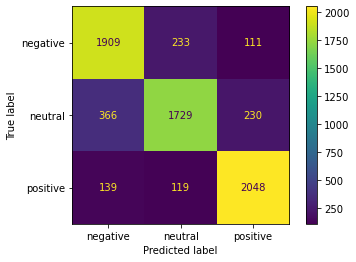

In [89]:
print('Classificaion Report    \n',classification_report(y_test,prd_NB_tfidf))
plot_confusion_matrix(pipe_tfidf,X_test,y_test)

# RandomForest, Countvectorizer

In [90]:
rand_model = RandomForestClassifier(random_state=101)

In [91]:
param_grid = {'n_estimators':[100,150,200,300],
             'max_depth':[None,2,3,4,6],
             }

In [92]:
grd_rand = GridSearchCV(rand_model,param_grid=param_grid,cv=3)

In [93]:
grd_rand.fit(X_feat_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [None, 2, 3, 4, 6],
                         'n_estimators': [100, 150, 200, 300]})

In [94]:
grd_rand.best_estimator_

RandomForestClassifier(n_estimators=300, random_state=101)

In [95]:
grd_rand.best_params_

{'max_depth': None, 'n_estimators': 300}

In [96]:
prd_grd_rand = grd_rand.predict(X_feat_test)

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.94      0.77      0.85      2253
     neutral       0.83      0.94      0.88      2325
    positive       0.92      0.96      0.94      2306

    accuracy                           0.89      6884
   macro avg       0.90      0.89      0.89      6884
weighted avg       0.90      0.89      0.89      6884



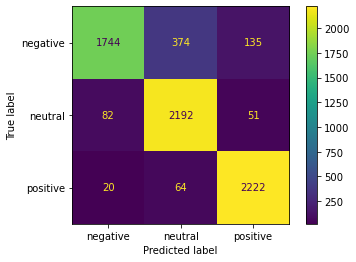

In [97]:
print('Classificaion Report    \n',classification_report(y_test,prd_grd_rand))
plot_confusion_matrix(grd_rand,X_feat_test,y_test)

# GradientBoosting, Countvectorizer

In [98]:
grad_model = GradientBoostingClassifier(random_state=101)

In [99]:
param_grid = {'learning_rate':[.05,.1,.15,.2],
             'n_estimators':[150,200,300],
             'max_depth' : [2,3,4]}

In [100]:
grd_grad = GridSearchCV(grad_model,param_grid=param_grid,cv=3)

In [101]:
grd_grad.fit(X_feat_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [150, 200, 300]})

In [103]:
grd_grad.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}

In [104]:
prd_grad = grd_grad.predict(X_feat_test)

Classificaion Report    
               precision    recall  f1-score   support

    negative       0.87      0.75      0.80      2253
     neutral       0.75      0.86      0.80      2325
    positive       0.88      0.86      0.87      2306

    accuracy                           0.82      6884
   macro avg       0.83      0.82      0.82      6884
weighted avg       0.83      0.82      0.83      6884



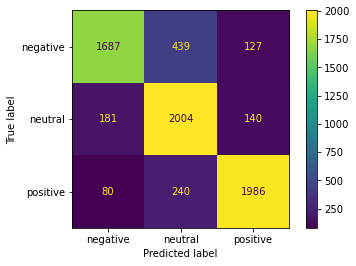

In [105]:
print('Classificaion Report    \n',classification_report(y_test,prd_grad))
plot_confusion_matrix(grd_grad,X_feat_test,y_test)

In [106]:
grd_tr_scr = grd_grad.score(X_feat_train,y_train)
grd_tr_scr

0.8877966101694915

In [107]:
grd_ts_scr = grd_grad.score(X_feat_test,y_test)
grd_ts_scr

0.8246658919233004

In [108]:
ovr_grad = grd_tr_scr - grd_ts_scr
ovr_grad

0.0631307182461911